In [16]:
import pandas as pd 
import matplotlib.pyplot as plt

Un breve informacion sobre los tados del dataframe


In [2]:
df=pd.read_csv('archivo/data.csv')


Un resumen sobre los tipos de datos que tiene , las columnas, cuantos valores nulos hay.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


Podemos ver los valores nulos en las columnas .

In [4]:
print(df.isna().sum())

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64


Lo siguiente es :
1. Limpieza de datos en los valores nulos con pandas.
2. Reemplazar el tipo de dato a la columna correspondiente(published_year,num_pages,ratings_count) , esta en valores flotantes, corregir esos tipos de datos.
3. Llevarlos a graficos.
4. Llevarlos a PowerBi.


In [5]:
df.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
1048,9780143037675,0143037676,Good Poems for Hard Times,NaN,Garrison Keillor,Poetry,http://books.google.com/books/content?id=Ap2kp...,Presents a collection of inspirational poems b...,2006.0,4.14,344.0,2611.0
6140,9781569708859,1569708851,The Left Hand Dreams of Him,NaN,Satoru Kannagi,Comics & Graphic Novels,http://books.google.com/books/content?id=UBd0A...,The growing romance between high school studen...,2006.0,3.95,242.0,528.0
2582,9780425181607,042518160X,Stephen King's Danse Macabre,NaN,Stephen King,Fiction,http://books.google.com/books/content?id=HxuOP...,The best-selling author offers a subjective to...,2001.0,3.63,400.0,20474.0
3204,9780486431840,0486431843,The Jew of Malta,NaN,Christopher Marlowe;Havelock Ellis,Drama,http://books.google.com/books/content?id=qjp-J...,"Prejudice, the intricacies of Mediterranean po...",2003.0,3.61,80.0,2822.0
3781,9780618711659,0618711651,Extremely Loud and Incredibly Close,NaN,Jonathan Safran Foer,Fiction,http://books.google.com/books/content?id=FHEy-...,"Oskar Schell, the nine-year-old son of a man k...",2006.0,3.98,326.0,325230.0


Segun yo creo que esta mal eliminar los datos de una columna , si es que voy a utilzarlos mas adelante, yo me enfocare en hacer un grafico de algunas columnas y eliminarlos alterarria los graficos

In [9]:
#hacemos un parametro de mediana en la columna 
# fillna() necesita que le pasemos un parametro para eso hacemos lo anterior
mediana_año=df['published_year'].median()
df['published_year']=df['published_year'].fillna(mediana_año).astype(int)

Si vamos a convertir varias columnas a medianas o haremos cambios de lo mismo en varias columnas , podemos convertirlos en diccionarios y cambiarlos todo en un solo codigo.
Pero no podemos cambiar el tipo de dato en un diccionario.


In [6]:
medianas ={'published_year':df['published_year'].median(),
           'average_rating':df['average_rating'].median(),
           'num_pages':df['num_pages'].median(),
           'ratings_count':df['ratings_count'].median() 
}
df.fillna(value=medianas,inplace=True)


columnas_a_convertir=['published_year','num_pages','ratings_count']

df[columnas_a_convertir] = df[columnas_a_convertir].astype(int)



In [7]:
df['subtitle']=df['subtitle'].fillna('No subtitle')
df['authors']=df['authors'].fillna('Unknown authors')
df['categories']=df['categories'].fillna('Uncategorized')
df['description']=df['description'].fillna('No Description Available')
df['thumbnail']=df['thumbnail'].fillna('NaN')

In [13]:
df.sample(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
2760,9780440220459,0440220459,Drop Shot,No subtitle,Harlan Coben,Fiction,http://books.google.com/books/content?id=1Wovm...,Investigating the killing of a burned-out tenn...,1996,3.93,341,19585
3097,9780452282193,0452282195,The Bluest Eye,No subtitle,Toni Morrison,Fiction,http://books.google.com/books/content?id=Nny9c...,The story of Pecola Breedlove profiles an elev...,1994,4.00,216,3262
1569,9780312643065,0312643063,The Price of the Ticket,"Collected Nonfiction, 1948-1985",James Baldwin,Literary Criticism,http://books.google.com/books/content?id=VbkZx...,The works of James Baldwin constitute one of t...,1985,4.70,712,396
2872,9780446579629,0446579629,The Red Gloves Collection,No subtitle,Karen Kingsbury,Fiction,http://books.google.com/books/content?id=_phtv...,Compiled in this collector edition are Gideon'...,2006,4.48,640,689
39,9780007105045,0007105045,Tree and Leaf,The Homecoming of Beorhtnoth : Beorhthelm's Son,John Ronald Reuel Tolkien,Literary Collections,http://books.google.com/books/content?id=aPb_A...,"""The two works 'On fairy-stories' and 'Leaf by...",2001,4.09,176,2245


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        6810 non-null   object 
 4   authors         6810 non-null   object 
 5   categories      6810 non-null   object 
 6   thumbnail       6810 non-null   object 
 7   description     6810 non-null   object 
 8   published_year  6810 non-null   int64  
 9   average_rating  6810 non-null   float64
 10  num_pages       6810 non-null   int64  
 11  ratings_count   6810 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 638.6+ KB


In [10]:
print(df.isna().sum())

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64


1. Los libros mas publicados en un solo año

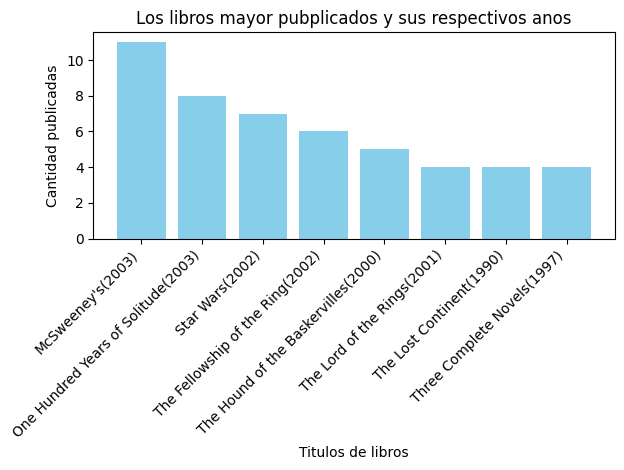

In [15]:
top_books = df['title'].value_counts().nlargest(8)

filter_df= df[df['title'].isin(top_books.index) ]

filter_df=filter_df.groupby('title')['published_year'].first().reset_index()

filter_df['count']=top_books.values

filter_df['title_year'] = filter_df['title']+'(' + filter_df['published_year'].astype(str)+')'

plt.bar(filter_df['title_year'],filter_df['count'],color='skyblue')

plt.title('Los libros mayor pubplicados y sus respectivos anos')
plt.xlabel('Titulos de libros')
plt.ylabel('Cantidad publicadas')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.show()

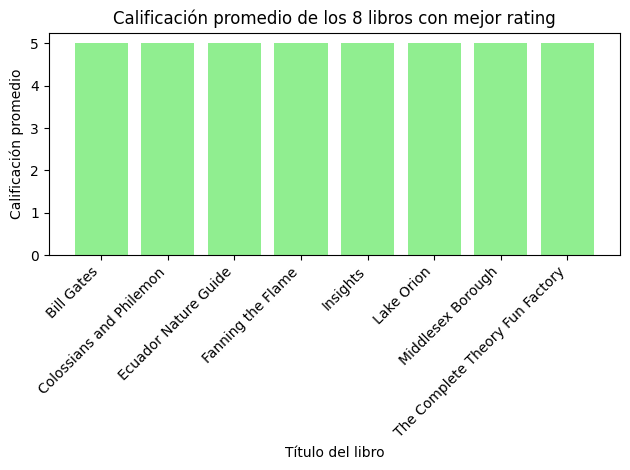

Bill Gates - Año de publicación: 2001
Colossians and Philemon - Año de publicación: 2005
Ecuador Nature Guide - Año de publicación: 2000
Fanning the Flame - Año de publicación: 2003
Insights - Año de publicación: 2003
Lake Orion - Año de publicación: 2006
Middlesex Borough - Año de publicación: 2003
The Complete Theory Fun Factory - Año de publicación: 1996


In [24]:


top_8_books = df.groupby('title')['average_rating'].mean().nlargest(8)

top_8_years = df[df['title'].isin(top_8_books.index)].drop_duplicates('title')[['title', 'published_year']]

plt.bar(top_8_books.index, top_8_books.values, color='lightgreen')


plt.title(f'Calificación promedio de los 8 libros con mejor rating')
plt.xlabel('Título del libro')
plt.ylabel('Calificación promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for title in top_8_books.index:
    year = top_8_years[top_8_years['title'] == title]['published_year'].iloc[0]
    print(f'{title} - Año de publicación: {year}')
